# Forest Fire Burn Area Prediction - CS345 Final Project

### - Kyle Cummings & Mike Peyton

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures

In [2]:
data = pd.read_csv("fires.csv", sep = ",") #Read In Values

Y = np.array(data[['area']].values)
X = data[data.columns[:-1]]

### Feature Correlation Values:

In [3]:
dataCorr = np.array(data.corr()[['area']].values) #Get Area Correlation Values 
featureCorr = dataCorr[:,0][:-1] #Remove Area to Area Correlation (Always 1)
features = ['X','Y','month','day','FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']

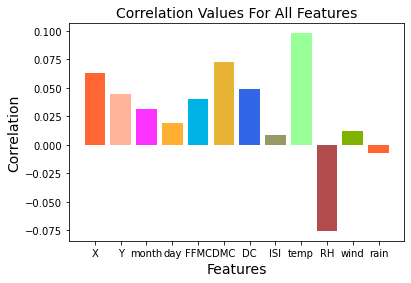

In [4]:
plt.bar(features, featureCorr, color = ['#FF6633', '#FFB399', '#FF33FF', '#FFAF32', '#00B3E6',  '#E6B333', '#3366E6', '#999966', '#99FF99', '#B34D4D','#80B300'])
plt.ylabel('Correlation', size = 14)
plt.xlabel('Features', size = 14)
plt.title('Correlation Values For All Features', size = 14)
plt.show()

**- <em>After analyzing the the corelation between total burn area and features we see that temp gives us the best correlation (0.09784). This values is considered a very low corealtion in general but is the best correlation of all features. Interestingly wind and rain correlation values were significantly lower than we initially thought.</em>**

### Mean corealtion before and after feature removal: 

In [5]:
#Remove Features With Lowest Correlation Coefficient 
featureCorr = np.abs(featureCorr)
coef_improved = np.array(featureCorr)
coef_improved = np.delete(featureCorr,11)
coef_improved = np.delete(featureCorr,10)
coef_improved = np.delete(featureCorr,7)
coef_improved = np.delete(featureCorr,3)

In [6]:
print('Mean Correlation w/o removal:', np.mean(featureCorr))
print('Mean Correlation w/ removal:',np.mean(coef_improved))

Mean Correlation w/o removal: 0.04350259434725592
Mean Correlation w/ removal: 0.04573775696608793


**- <em>We removed the features rain, wind, and ISI because they were amongst the lowest corealtion values of all features significantly. After computing the mean correlation values before and after removing insignificant features we see an increase in overall correlation. 0.04350 Before and .045738 after removal.</em>**

### Linear regression:

##### Performing cross validation to get optimal hyperparameters:

In [7]:
from sklearn.model_selection import GridSearchCV

linreg = LinearRegression()

param_grid = {'fit_intercept': [True, False],
              'normalize': [True, False]}

classifier = GridSearchCV(linreg, param_grid)

classifier.fit(X, Y);

In [8]:
classifier.best_params_

{'fit_intercept': False, 'normalize': True}

##### Removing rows where area = 0:

In [9]:
data_clean = []
for row in data.values:
    if(row[-1] != 0):
        data_clean.append(row)

data_clean = np.array(data_clean)

X_clean = data_clean[:,:12]
y_clean = data_clean[:,12]

##### Fitting with degree 1 on the original dataset:

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=.3, random_state = 2)

linreg = LinearRegression(fit_intercept=False, normalize=True)
linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)

In [11]:
linReg_no0 = np.mean(np.abs(y_pred-y_test))
print('Error After Removing Rows Where Area = 0:', linReg_no0) #Error calculation

Error After Removing Rows Where Area = 0: 28.161155996889725


**Originally we thought that removing zeros would decrease overall but we can see that removing the zeroes was actual quite detrimental to the accuracy of the regression. We will leave this out.**

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.3, random_state = 2)
linreg = LinearRegression(fit_intercept=False, normalize=True)
linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)

In [13]:
print('Error Leaving Rows Where Area = 0 In:', np.mean(np.abs(y_pred-y_test))) #Error calculation

Error Leaving Rows Where Area = 0 In: 19.263999962907985


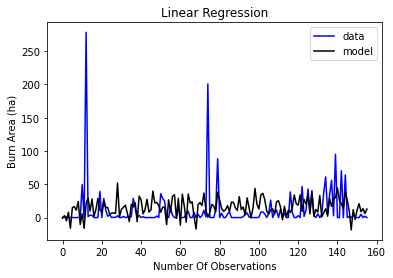

In [14]:
plt.plot(y_test, color='blue', label = 'data')
plt.plot(y_pred, color='black', label = 'model')
plt.ylabel('Burn Area (ha)')
plt.xlabel('Number Of Observations')
plt.legend(loc="upper right")
plt.title('Linear Regression')
plt.show()

**Fitting the regression with degree 1 on the improved dataset**

In [15]:
new_X = np.array(X)
new_X = np.delete(new_X, 11, 1)
new_X = np.delete(new_X, 10, 1)
new_X = np.delete(new_X, 7, 1)
new_X = np.delete(new_X, 3, 1)

X_train, X_test, y_train, y_test = train_test_split(new_X, Y, test_size=.3, random_state=2)

linreg = LinearRegression(fit_intercept=False, normalize=True)
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)

In [16]:
print(np.mean(np.abs(y_pred-y_test))) #Error calculation

18.106610812591672


Text(0.5, 1.0, 'Linear Regression w/ Improved Dataset')

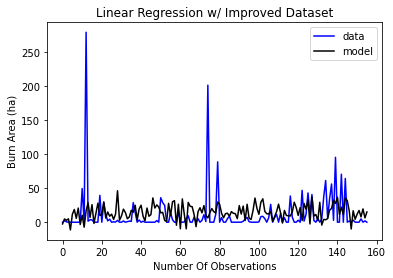

In [17]:
plt.plot(y_test, color='blue', label = 'data')
plt.plot(y_pred, color='black', label = 'model')
plt.legend(loc="upper right")
plt.ylabel('Burn Area (ha)')
plt.xlabel('Number Of Observations')
plt.title('Linear Regression w/ Improved Dataset')

### Elastic Net Regression:

##### Performing cross validation to get optimal hyperparameters:

In [18]:
regr = ElasticNet()

param_grid = {'fit_intercept': [True, False],
              'normalize': [True, False],
              'alpha': [1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2]}

classifier = GridSearchCV(regr, param_grid)

classifier.fit(X, Y);

In [19]:
classifier.best_params_

{'alpha': 1, 'fit_intercept': True, 'normalize': True}

##### Fitting with opitimal hyperparameters:

In [20]:
regr = ElasticNet(fit_intercept = True, normalize=True, alpha=1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.3, random_state = 2)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

In [21]:
print(np.mean(np.abs(y_pred-y_test))) #Error calculation

16.890496484125293


Text(0.5, 1.0, 'Elastic Net Regression')

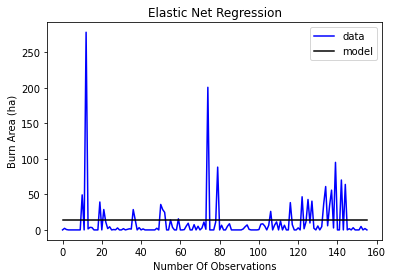

In [22]:
plt.plot(y_test, color='blue', label = 'data')
plt.plot(y_pred, color='black', label = 'model')
plt.legend(loc="upper right")
plt.ylabel('Burn Area (ha)')
plt.xlabel('Number Of Observations')
plt.title('Elastic Net Regression')

**Although these results gave us a lower error, we can clearly see from the graph that underfitting is taking place**

In [23]:
classifier.best_params_

{'alpha': 1, 'fit_intercept': True, 'normalize': True}

### Polynomial Regression

**Although highly skeptical, we will now try with Polynomial Regression, of degree 2, since all other degrees cause massive overfitting for this particular dataset.**

In [24]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline

Text(0.5, 1.0, 'Polynomial Regression')

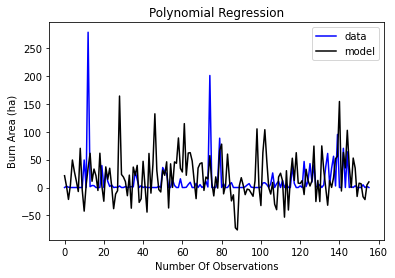

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.3, random_state=2)
model = make_pipeline(PolynomialFeatures(2), Ridge())
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
plt.plot(y_test, color='blue', label = 'data')
plt.plot(y_pred, color='black', label = 'model')
plt.legend(loc="upper right")
plt.ylabel('Burn Area (ha)')
plt.xlabel('Number Of Observations')
plt.title('Polynomial Regression')

In [26]:
print(np.mean(np.abs(y_pred-y_test)))

32.087427237079204


### Random Forest Regression

**Since our results using the previous three classifiers was mediocre, we have decided that random forest regression might be more appropriate for this problem.**

##### Performing cross validation to get optimal hyperparameters:

In [27]:
from sklearn.ensemble import RandomForestRegressor

Y = Y.transpose()[0]
regressor = RandomForestRegressor()

param_grid = {'n_estimators': [10,12,15,17,20,25,50],
              'max_depth': [2,3,5,10, None]}

classifier = GridSearchCV(regressor, param_grid)

classifier.fit(X, Y);

In [28]:
classifier.best_params_

{'max_depth': 3, 'n_estimators': 10}

In [32]:
regressor = RandomForestRegressor(n_estimators=10, max_depth=3)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.3, random_state=2)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [33]:
print(np.mean(np.abs(y_pred-y_test))) #Error calculation

15.185647846967058


Text(0.5, 1.0, 'Random Forest Regression')

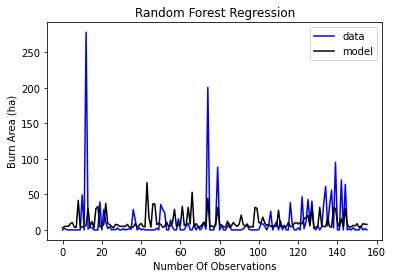

In [34]:
plt.plot(y_test, color = 'blue', label = 'data')
plt.plot(y_pred, color = 'black', label = 'model')
plt.legend(loc="upper right")
plt.ylabel('Burn Area (ha)')
plt.xlabel('Number Of Observations')
plt.title('Random Forest Regression')

## Conclusion:

Our original goal was to predict the total burn area of a forest fire given several different features. To do this we planned on using several different regression algorithms in order to reduce error rate.

We performed 4 different types of regression as well as model selection to optimize our hyperparamaters, as well as attempt to manipulate the data through standardization or getting rid of the zeroes for our expected Y values. We found that the best solution for this tricky problem was Random Forest Regression, as it gave us an improved error rate as well as better predictions. However in retrospect, although regression is appropriate for predicting continous values from a dataset, it heavily relies on decent correlation and also few outliers. 

A significant challenge we faced throughout this project is the lack of decent correlation values. The maximum value that we had was 0.09784 which is a very low correlation. On top of that, the data set didn't particularly represent the features accurately and there were outliers as well as other factors that contribute to forest fire spread that was not addressed in this dataset. With the given data we did the best we could to retrieve the best results which ended up being partially successful. 

This is due to the complex nature of the problem, as well as the oversimplification of the dataset. There are simply too many factors not accounted for in the dataset that inhibit our ability to get accurate results. It is hard to predict when a fire will burn at 10x the speed the following day when there is such little change in the data. The fire that burned hundreds of thousands of acres in California was due to a gender reveal party, and these sorts of things are hard to predict, given the nature of the dataset. 

Below you will find a table including all error rates from all forms of regression we used, as well as before and after feature removal.

| Classifier | Error Rate |
| ---- | ---- |
| Linear Regression | 19.2640 |
| Linear Regression After Removing 0s  | 28.1612 |
| Linear Regression After Feature Removal | 18.1066 |
| Elastic Net Regression | 16.8905 |
| Polynomial Regression | 32.0874 |
| Random Forest Regression | 15.1856 |

**And a closing graph of our best prediction:**

Text(0.5, 1.0, 'Random Forest Regression')

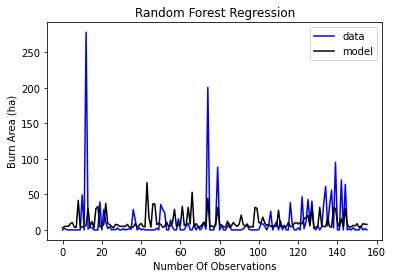

In [35]:
plt.plot(y_test, color = 'blue', label = 'data')
plt.plot(y_pred, color = 'black', label = 'model')
plt.legend(loc="upper right")
plt.ylabel('Burn Area (ha)')
plt.xlabel('Number Of Observations')
plt.title('Random Forest Regression')